# EDA para información entregada por Sernapesca

#### Introducción
Este Noteboopk corresponde al análisis exploratorio del archivo enviado por sernapesca llamado "Reporte de Plantas.xlsx", el cual es extraido desde una platadorma interna, la cual no es la ya conocida Reporteador. 
 
Resumen:
* Tiene una dimensión de (54211, 35).
* Este archivo es una tabla con los ingresos a las plantas, entrega información de los centros de cultivo de origen.
* Es para la III, IV, V, RM, VIII, IX, X, XIV
* Sólo para las especies de Molusco.

### Import libreries

In [2]:
import logging
import subprocess
import os   
import pandas as pd
import seaborn as sns

### Reading file "Ingresos"

In [3]:
%%time
reporte_plantas_raw = pd.read_excel("../data/datos_nelson/Reporte de Plantas.xlsx")

CPU times: total: 28.3 s
Wall time: 28.9 s


In [4]:
reporte_plantas_raw.shape

(54211, 35)

In [5]:
reporte_plantas_raw.head()

,Año Declaración,Mes Declaración,Región Agente,Tipo Agente,Código Agente,Nombre Agente,Fecha Declaración,Nº Declaración,idStock,Tipo Item,...,utilizado,Toneladas Rest,Unidades Rest,Tipo Declaración,idBodega,Nombre Bodega,Tipo Bodega,Dirección Bodega,Ciudad Bodega,Región Bodega
0,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607070,4412221,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
1,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607070,4412222,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
2,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607070,4412223,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
3,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607071,4412225,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
4,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607071,4412226,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION


In [6]:
reporte_plantas_raw.columns.to_list()

['Año Declaración',
 'Mes Declaración',
 'Región Agente',
 'Tipo Agente',
 'Código Agente',
 'Nombre Agente',
 'Fecha Declaración',
 'Nº Declaración',
 'idStock',
 'Tipo Item',
 'Código Item',
 'Nombre Item',
 'Fecha Item',
 'Estado Recurso',
 'Tipo Origen',
 'Código Origen',
 'Nombre Origen',
 'Folio Origen',
 'Tipo Ult. Proveedor',
 'Código Ult. Proveedor',
 'Nombre Ult. Proveedor',
 'Folio Ult. Proveedor',
 'Fecha Ult. Proveedor',
 'Toneladas Abastecidas',
 'Unidades Abastecidas',
 'utilizado',
 'Toneladas Rest',
 'Unidades Rest',
 'Tipo Declaración',
 'idBodega',
 'Nombre Bodega',
 'Tipo Bodega',
 'Dirección Bodega',
 'Ciudad Bodega',
 'Región Bodega']

In [7]:
reporte_plantas_raw.info

<bound method DataFrame.info of        Año Declaración Mes Declaración         Región Agente Tipo Agente  \
0                 2021            ene.            III REGION      Planta   
1                 2021            ene.            III REGION      Planta   
2                 2021            ene.            III REGION      Planta   
3                 2021            ene.            III REGION      Planta   
4                 2021            ene.            III REGION      Planta   
...                ...             ...                   ...         ...   
54206             2022            jun.  REGION METROPOLITANA      Planta   
54207             2022            jun.  REGION METROPOLITANA      Planta   
54208             2022            jun.  REGION METROPOLITANA      Planta   
54209             2022            jun.  REGION METROPOLITANA      Planta   
54210             2021            jun.            XIV REGION      Planta   

       Código Agente                                   

In [8]:
reporte_plantas_raw.describe()

,Año Declaración,Código Agente,Nº Declaración,idStock,Código Item,Código Origen,Folio Origen,Código Ult. Proveedor,Folio Ult. Proveedor,Toneladas Abastecidas,Unidades Abastecidas,Toneladas Rest,idBodega
count,54211.000000,54211.000000,5.421100e+04,5.421100e+04,54211.000000,54211.000000,5.421100e+04,54211.000000,5.421100e+04,54211.000000,54211.000000,54211.000000,54211.000000
mean,2021.390954,10553.460276,3.758622e+06,5.492582e+06,430.770692,101613.924683,6.968702e+05,73688.623748,1.212061e+06,12.567038,220.313294,0.306546,2908.368855
std,0.487969,1123.627020,9.948752e+04,7.026123e+05,4.475930,10554.387008,8.370285e+04,44532.792420,8.294345e+05,6.870604,1660.490364,1.404914,475.163295
min,2021.000000,3061.000000,3.597585e+06,4.344185e+06,425.000000,30052.000000,1.606080e+05,498.000000,2.204530e+05,0.001000,0.000000,0.000000,347.000000
25%,2021.000000,10671.000000,3.672702e+06,4.885706e+06,430.000000,102389.000000,6.558465e+05,6794.000000,6.630885e+05,10.000000,0.000000,0.000000,2719.000000
50%,2021.000000,10752.000000,3.735151e+06,5.336157e+06,430.000000,103334.000000,6.798220e+05,102515.000000,6.987030e+05,10.835000,0.000000,0.000000,2750.000000
75%,2022.000000,10774.000000,3.849761e+06,6.135358e+06,430.000000,103765.000000,7.021245e+05,103652.000000,2.149322e+06,12.550000,0.000000,0.000000,2869.000000
max,2022.000000,14004.000000,3.923734e+06,6.654844e+06,457.000000,814014.000000,1.025508e+06,814014.000000,6.236651e+06,88.750000,55000.000000,60.370000,4278.000000


In [9]:
reporte_plantas_raw.duplicated().sum()

0

In [10]:
reporte_plantas_raw.isnull().sum()

Año Declaración          0
Mes Declaración          0
Región Agente            0
Tipo Agente              0
Código Agente            0
Nombre Agente            0
Fecha Declaración        0
Nº Declaración           0
idStock                  0
Tipo Item                0
Código Item              0
Nombre Item              0
Fecha Item               0
Estado Recurso           0
Tipo Origen              0
Código Origen            0
Nombre Origen            0
Folio Origen             0
Tipo Ult. Proveedor      0
Código Ult. Proveedor    0
Nombre Ult. Proveedor    0
Folio Ult. Proveedor     0
Fecha Ult. Proveedor     0
Toneladas Abastecidas    0
Unidades Abastecidas     0
utilizado                0
Toneladas Rest           0
Unidades Rest            0
Tipo Declaración         0
idBodega                 0
Nombre Bodega            0
Tipo Bodega              0
Dirección Bodega         0
Ciudad Bodega            0
Región Bodega            0
dtype: int64

In [11]:
reporte_plantas_raw.dtypes

Año Declaración                   int64
Mes Declaración                  object
Región Agente                    object
Tipo Agente                      object
Código Agente                     int64
Nombre Agente                    object
Fecha Declaración        datetime64[ns]
Nº Declaración                    int64
idStock                           int64
Tipo Item                        object
Código Item                       int64
Nombre Item                      object
Fecha Item               datetime64[ns]
Estado Recurso                   object
Tipo Origen                      object
Código Origen                     int64
Nombre Origen                    object
Folio Origen                      int64
Tipo Ult. Proveedor              object
Código Ult. Proveedor             int64
Nombre Ult. Proveedor            object
Folio Ult. Proveedor              int64
Fecha Ult. Proveedor     datetime64[ns]
Toneladas Abastecidas           float64
Unidades Abastecidas              int64


In [42]:
reporte_plantas_raw['Código Agente'].nunique()

53

In [17]:
#reporte_plantas_raw['Tipo Item'].unique().tolist()
#reporte_plantas_raw['Tipo Origen'].unique().tolist()
reporte_plantas_raw['Región Bodega'].unique().tolist()
#reporte_plantas_raw['Región Agente'].unique().tolist()

['III REGION',
 'IV REGION',
 'V REGION',
 'VIII REGION',
 'IX REGION',
 'X REGION',
 'REGION METROPOLITANA',
 'XIV REGION']

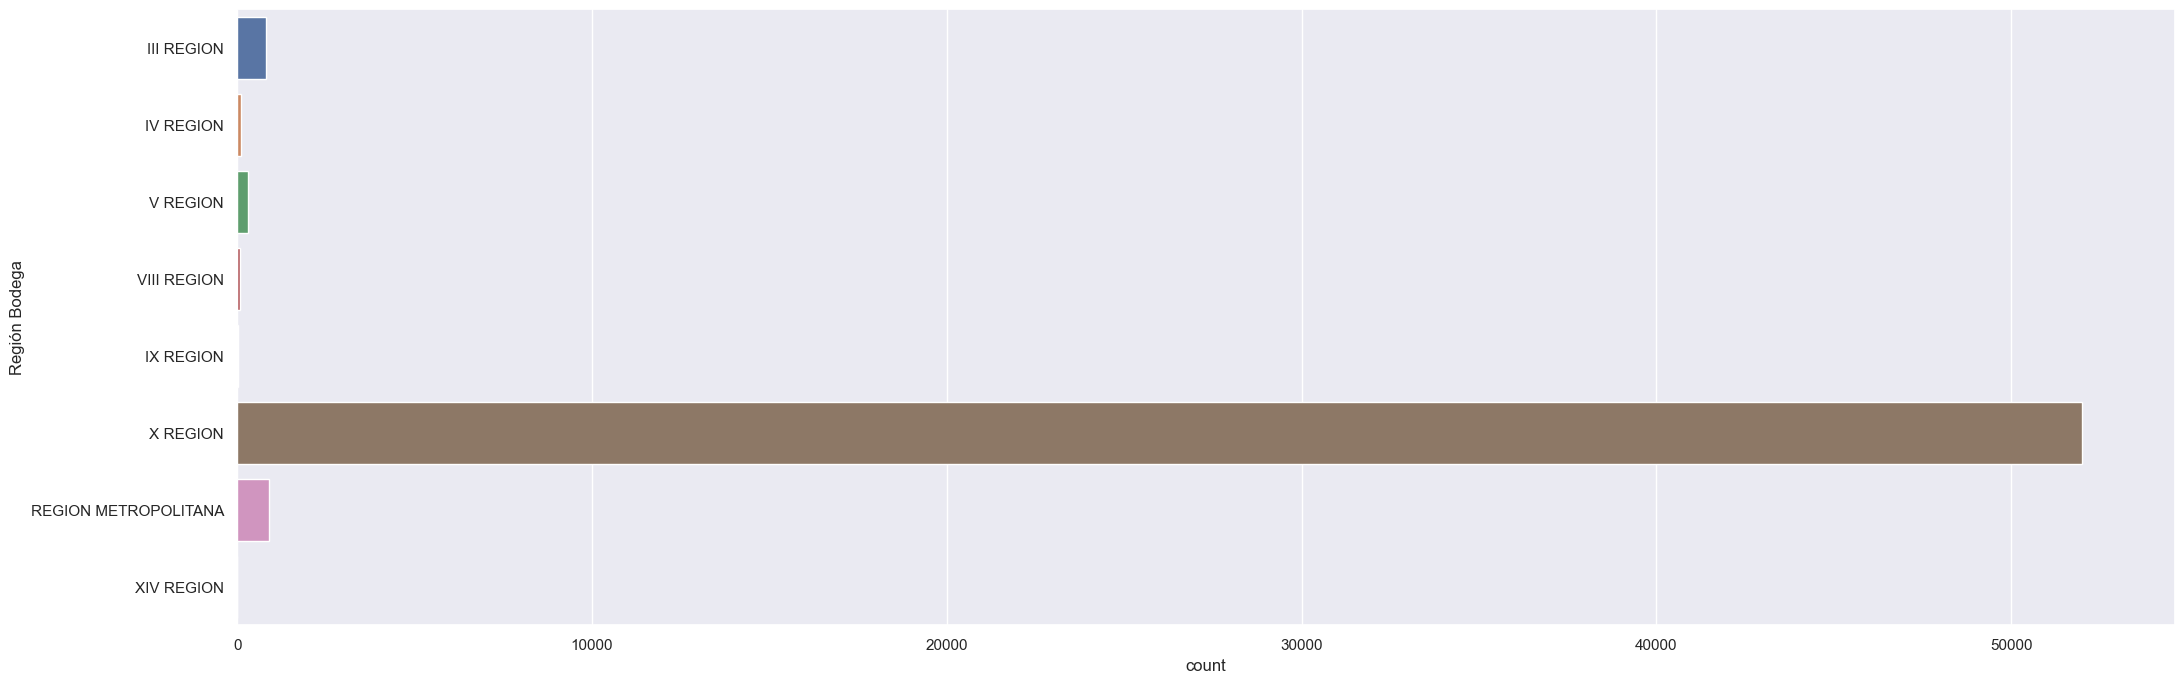

In [20]:
def count_clases(column_name):
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(y=column_name, data=reporte_plantas_raw)
    sns.set(rc = {'figure.figsize':(25,8)})
    #for item in ax.get_xticklabels():
    #    item.set_rotation(90)

count_clases('Región Bodega')

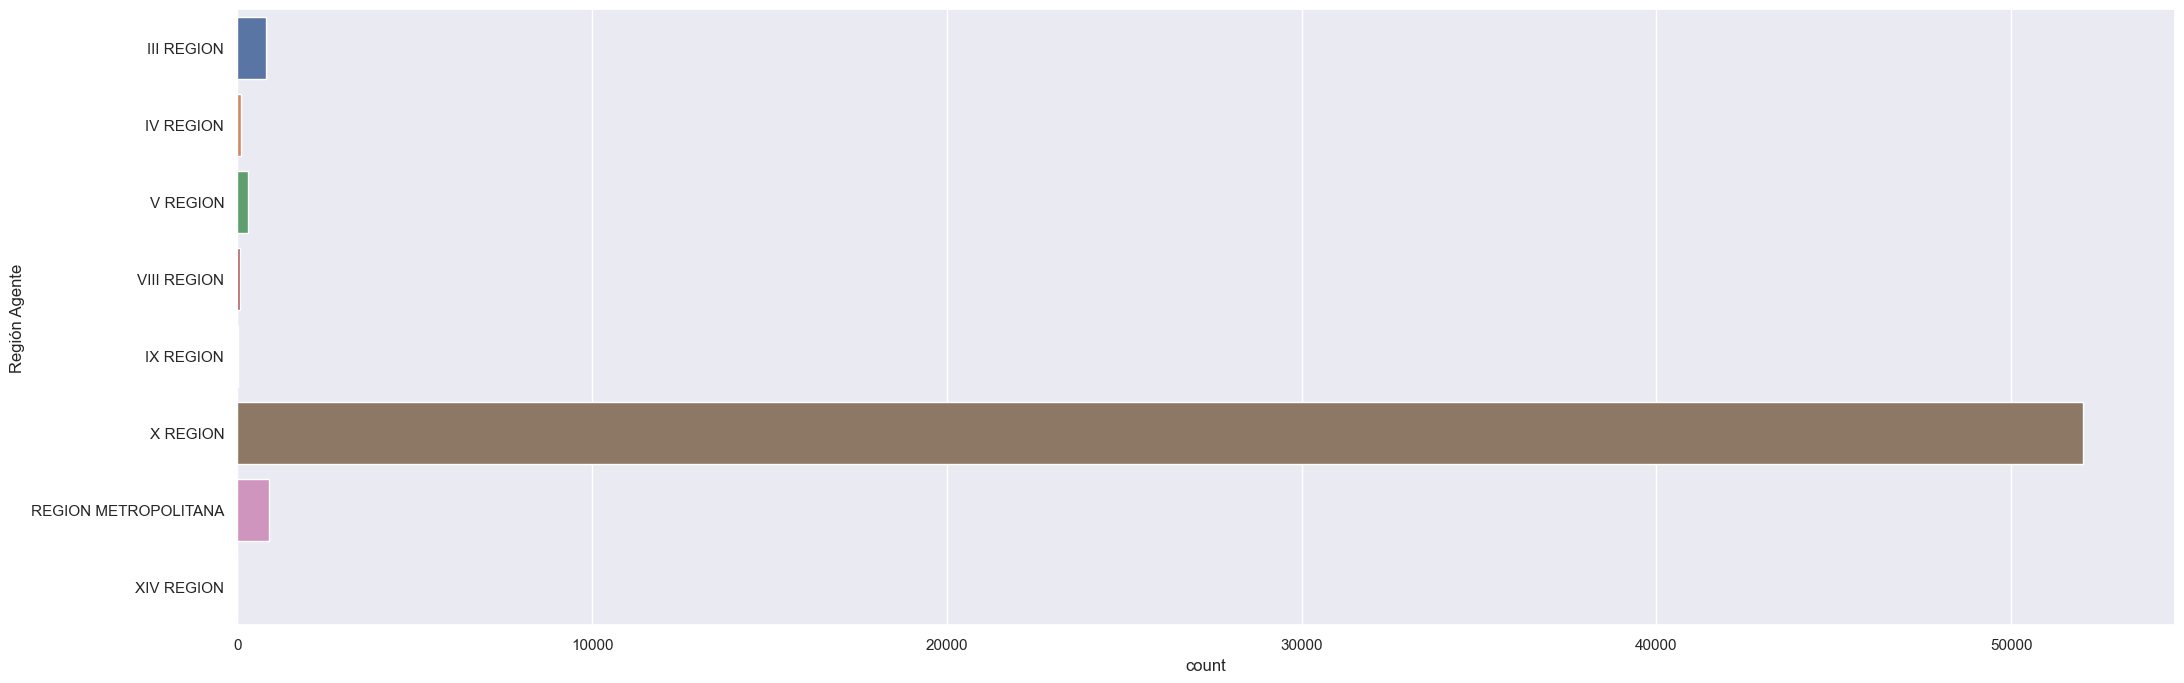

In [23]:
count_clases('Región Agente')

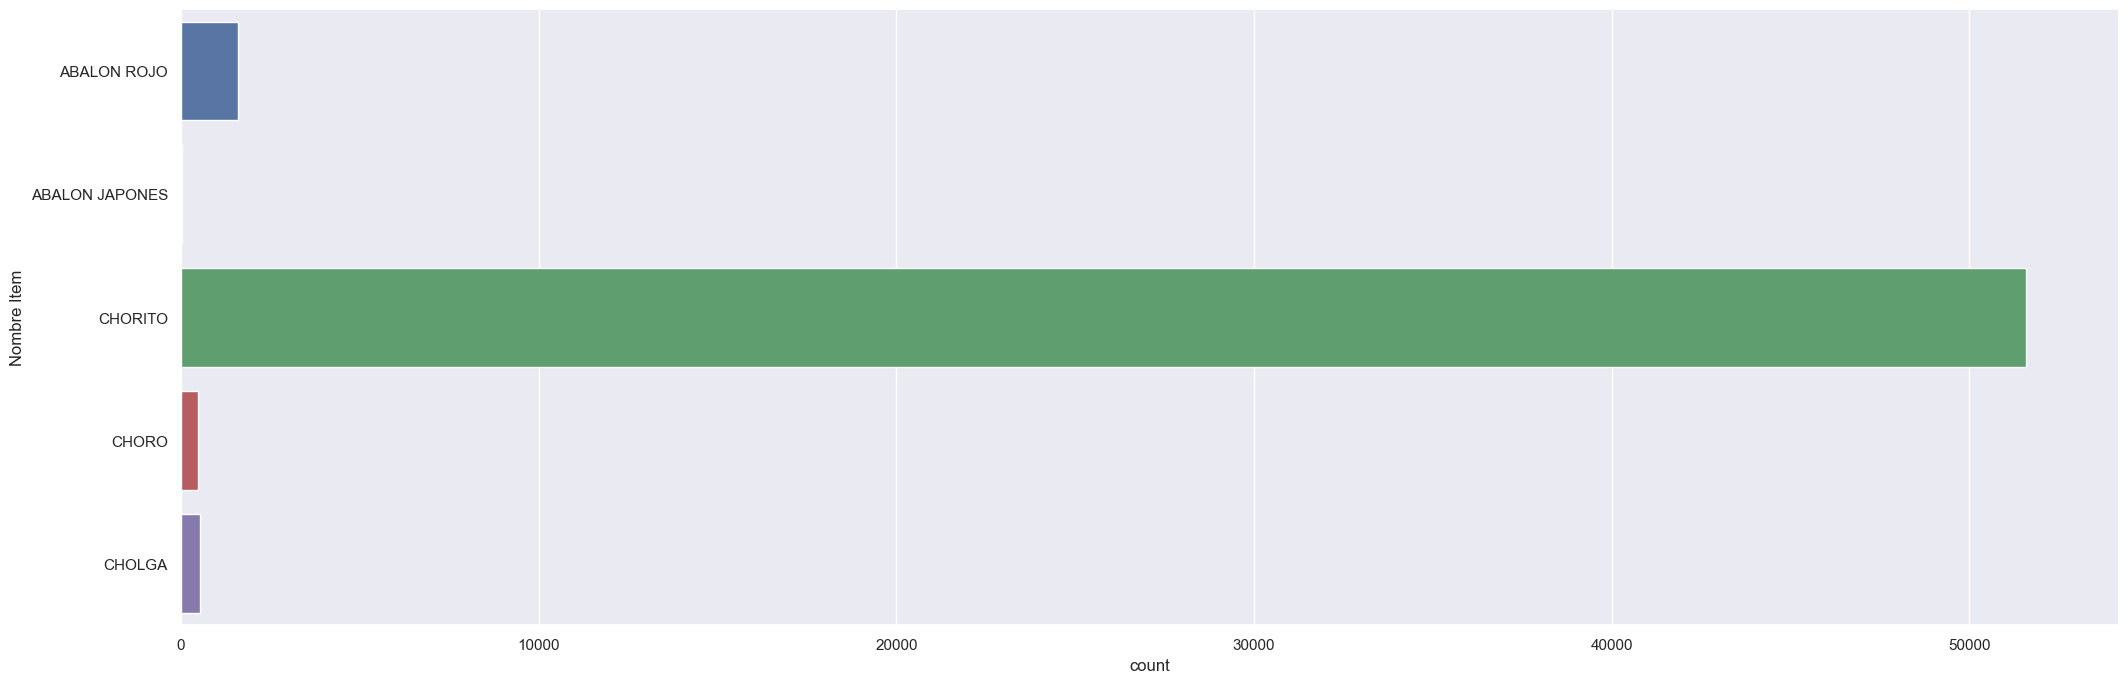

In [25]:
count_clases('Nombre Item')

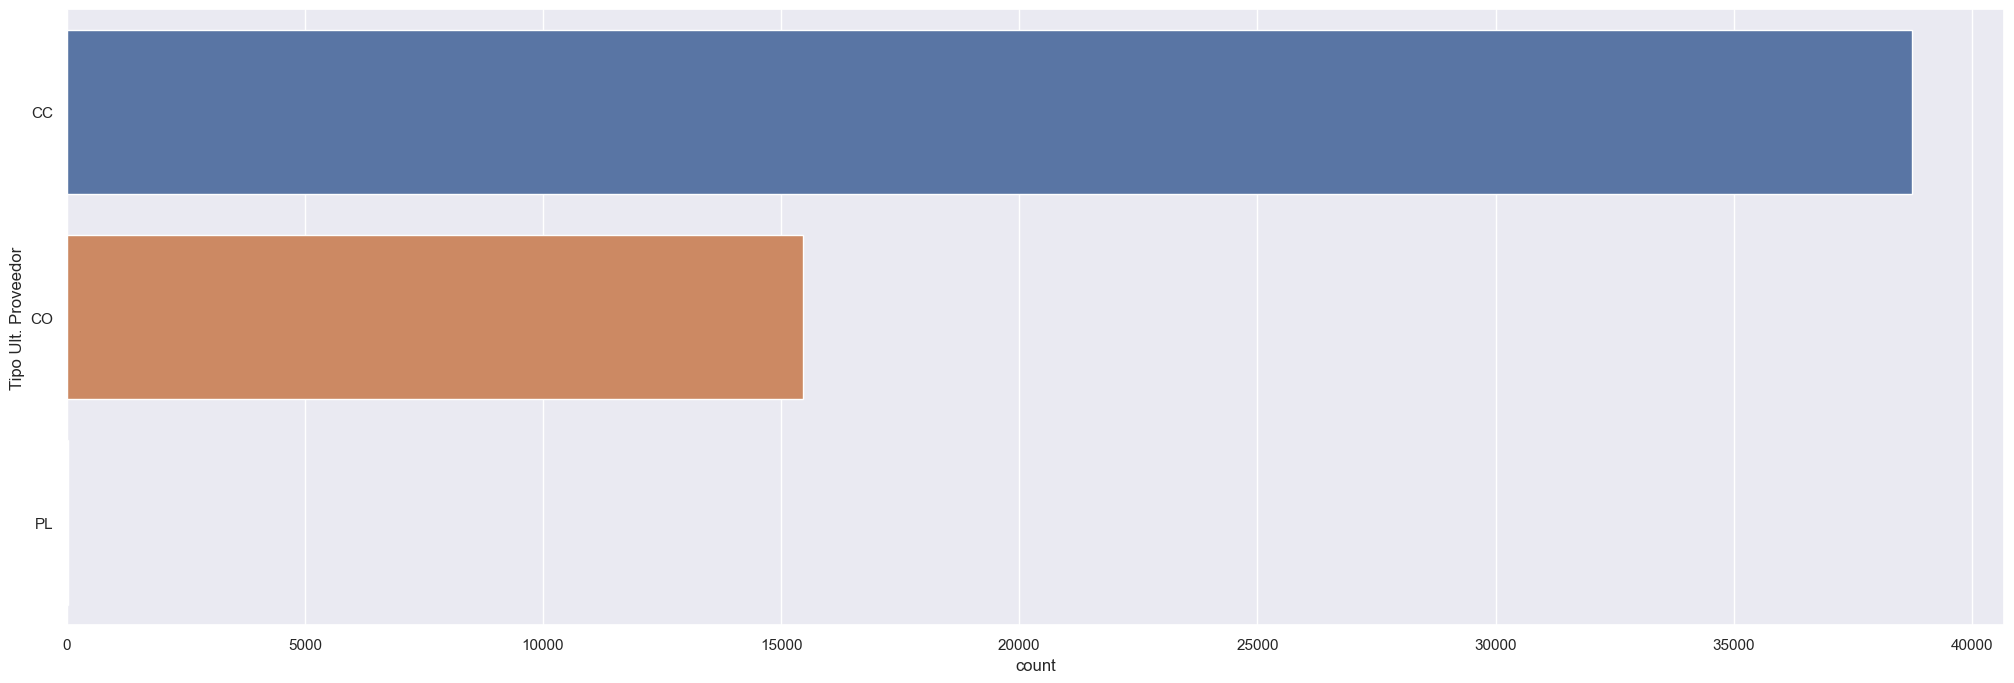

In [30]:
count_clases('Tipo Ult. Proveedor')

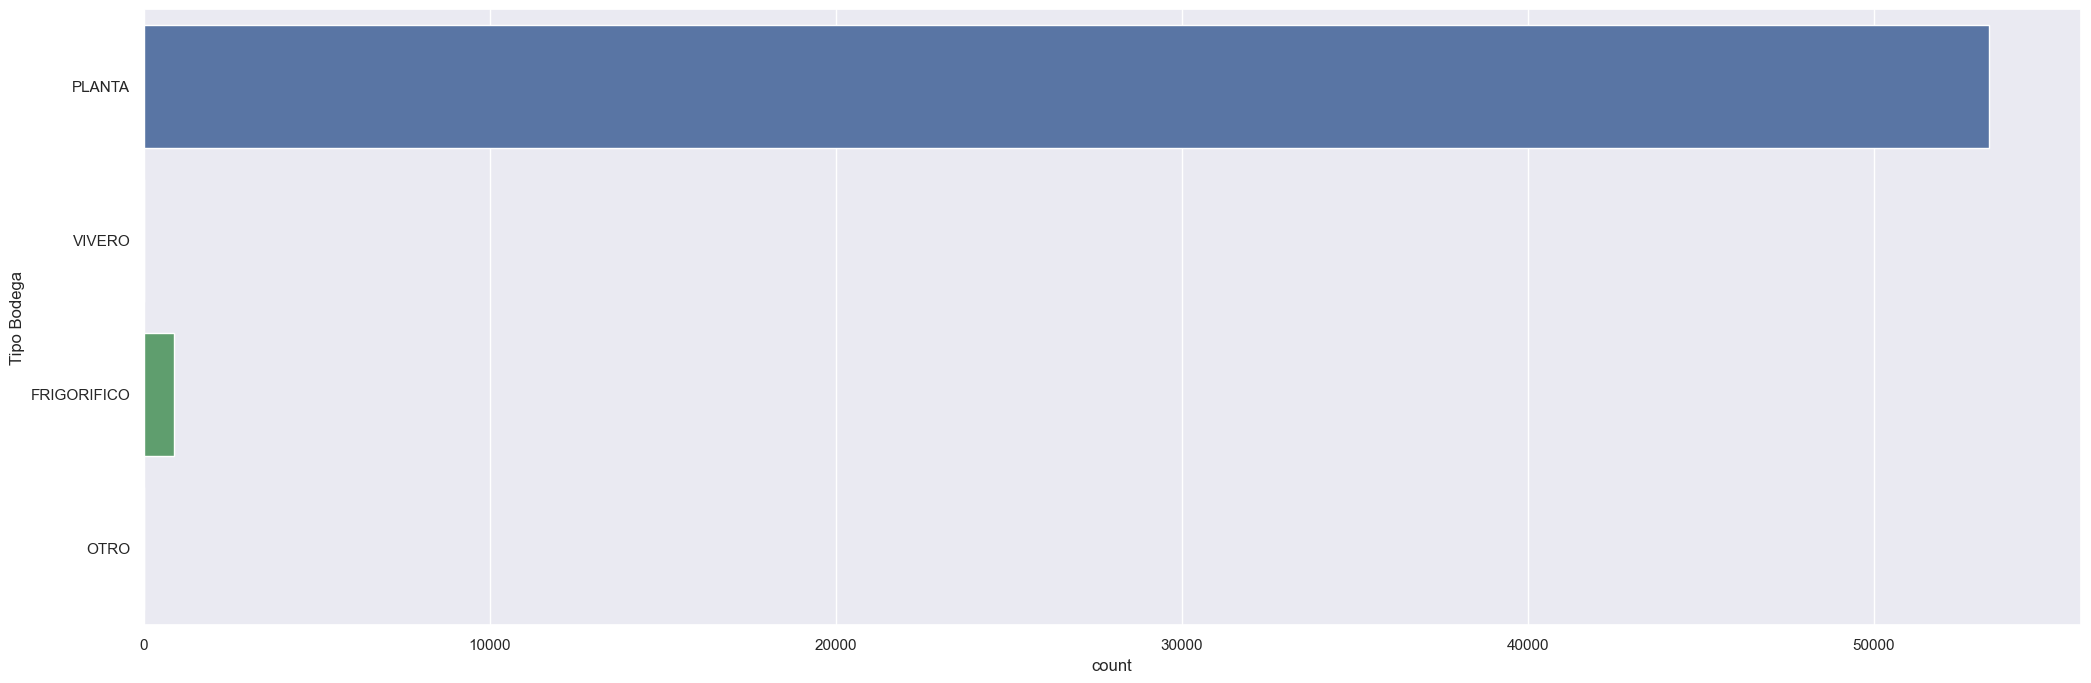

In [35]:
count_clases('Tipo Bodega')

In [58]:
reporte_plantas_raw['Origen'].unique().tolist()

['Declarar Existencias de Especies de Cultivo con Aut. Movimiento',
 'Declarar Existencias de Especies de Cultivo por Importación o  Autoabastecimiento',
 'Ingresos por diferencia',
 'Otros',
 'Centro de Cultivo',
 'Área de Manejo',
 'Comercializadora']

In [76]:
#len(reporte_plantas_raw)
q_centros_ingresos = len(reporte_plantas_raw['Codigo Centro'].unique().tolist())
q_centros_origen = len(reporte_plantas_raw['Cod. Origen'].unique().tolist())
print(f'En total existen {q_centros_ingresos} lugares de ingresos y {q_centros_origen} lugares de origen ' )

En total existen 1211 lugares de ingresos y 935 lugares de origen 
